In [1]:
# install libraries PyPortfolioOpt, DiscreteAllocation, pandas_datareader
#Import the python libraries

import pandas_datareader.data as data
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
#Get the SLOCK SYMOOIS LICker's in the portто110 
assets = ['RELIANCE.NS','ITC.NS', 'DRREDDY.NS','TATAMOTORS.NS','ASIANPAINT.NS','BAJFINANCE.NS','CIPLA.NS']


# Assign weights to the stocks. 
weights = np.array([1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4])

# Get the stock/portfolio starting date 

stockStartDate = '2018-01-01'

In [3]:
#Get the stocks ending date (today) 

today = datetime.today().strftime('%Y-%m-%d')

# Create a dataframe to store the adjusted close proce of the stocks 

df = pd.DataFrame()

#Store the adjusted close price of the stock into the df

for stock in assets:

    df[stock] = data.DataReader(stock, data_source='yahoo', start = '2020-01-01', end = today)['Adj Close']
    #df[stock] = web.DataReader(stock, data_source='yahoo', start=datetime(2017, 2, 9), end=datetime(2019, 5, 24))['Adj Close']

In [4]:
df

,RELIANCE.NS,ITC.NS,DRREDDY.NS,TATAMOTORS.NS,ASIANPAINT.NS,BAJFINANCE.NS,CIPLA.NS
Date,,,,,,,
2020-01-01,1480.595825,205.544617,2796.778320,184.449997,1758.172852,4199.495605,469.780518
2020-01-02,1505.802124,207.055328,2782.694336,193.750000,1755.672729,4214.134277,467.411346
2020-01-03,1507.616577,205.889908,2801.148682,191.100006,1717.189453,4161.930176,463.907043
2020-01-06,1472.651367,202.954803,2796.244141,185.649994,1673.803833,3966.658936,460.748169
2020-01-07,1495.307617,203.170624,2801.440430,184.699997,1690.716919,3977.526611,462.574371
...,...,...,...,...,...,...,...
2022-11-28,2707.550049,340.049988,4402.000000,433.250000,3151.199951,6777.450195,1101.750000
2022-11-29,2712.199951,342.299988,4453.350098,433.149994,3135.050049,6734.149902,1121.150024
2022-11-30,2731.350098,340.000000,4487.149902,439.399994,3175.149902,6720.950195,1139.650024


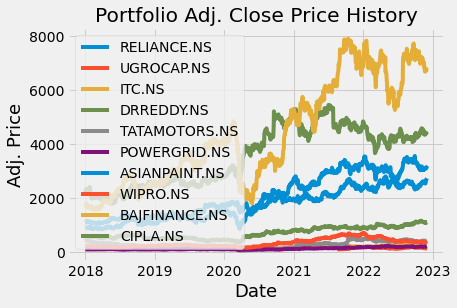

In [5]:
#Visually show the stock / portfolio 

title = 'Portfolio Adj. Close Price History'
# Get the stocks

my_stocks = df

#Create and plot the graph

for c in my_stocks.columns.values: 
    plt.plot(my_stocks[c], label = c)

plt.title(title)

plt.xlabel('Date', fontsize=18)

plt.ylabel('Adj. Price', fontsize = 18)

plt.legend(my_stocks.columns.values, loc = 'upper left') 
plt.show()

In [5]:
#dairly returns
returns = df.pct_change()
returns


,RELIANCE.NS,ITC.NS,DRREDDY.NS,TATAMOTORS.NS,ASIANPAINT.NS,BAJFINANCE.NS,CIPLA.NS
Date,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.017024,0.007350,-0.005036,0.050420,-0.001422,0.003486,-0.005043
2020-01-03,0.001205,-0.005629,0.006632,-0.013677,-0.021919,-0.012388,-0.007497
2020-01-06,-0.023192,-0.014256,-0.001751,-0.028519,-0.025265,-0.046918,-0.006809
2020-01-07,0.015385,0.001063,0.001858,-0.005117,0.010105,0.002740,0.003964
...,...,...,...,...,...,...,...
2022-11-28,0.034364,-0.000735,-0.003644,0.000115,0.013851,0.004439,-0.003257
2022-11-29,0.001717,0.006617,0.011665,-0.000231,-0.005125,-0.006389,0.017608
2022-11-30,0.007061,-0.006719,0.007590,0.014429,0.012791,-0.001960,0.016501


In [6]:
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,RELIANCE.NS,ITC.NS,DRREDDY.NS,TATAMOTORS.NS,ASIANPAINT.NS,BAJFINANCE.NS,CIPLA.NS
RELIANCE.NS,0.121786,0.032296,0.029234,0.073740,0.039423,0.068447,0.016528
ITC.NS,0.032296,0.090809,0.016130,0.055897,0.021468,0.044236,0.018336
DRREDDY.NS,0.029234,0.016130,0.083852,0.023640,0.025747,0.018959,0.045523
TATAMOTORS.NS,0.073740,0.055897,0.023640,0.258678,0.044135,0.114655,0.024910
ASIANPAINT.NS,0.039423,0.021468,0.025747,0.044135,0.090878,0.052438,0.016042
BAJFINANCE.NS,0.068447,0.044236,0.018959,0.114655,0.052438,0.205746,0.016604
CIPLA.NS,0.016528,0.018336,0.045523,0.024910,0.016042,0.016604,0.091492


In [7]:
#Calculate the portfolio variance

port_variance = np.dot( weights.T, np.dot (cov_matrix_annual, weights)) 
port_variance

4.978427986434217

In [8]:
#Calculate the portfolio volatility aka standard deviation 

port_volatility = np.sqrt(port_variance)

port_volatility

2.2312391145805544

In [9]:
#Calculate the annual portfolio return 
portfolioSimple_Annual_Return = np.sum(returns.mean() * weights) * 252 

portfolioSimple_Annual_Return

2.7732927453726504

In [11]:
#the expected annual return, volatility (risk), and variance

percent_var = str( round(port_variance, 2) * 100) + '%'

percent_vols = str(round (port_volatility, 2)* 100 )+ '%'

percent_ret = str(round (portfolioSimple_Annual_Return, 2)* 100) + '%'

print('Expected annual return:' + percent_ret) 
print('Annual volatility risk:' + percent_vols)
print('Annual variance:' + percent_var)

Expected annual return:277.0%
Annual volatility risk:223.0%
Annual variance:498.00000000000006%


In [12]:
import pypfopt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [13]:
#Portfolio Optimization !
#Calculate the expected returns and the annualised sample covariance matrix of asset returns 

mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)

#optimize for max sharpe ratio

ef = EfficientFrontier (mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print (cleaned_weights)

ef.portfolio_performance (verbose = True)

OrderedDict([('RELIANCE.NS', 0.0985), ('ITC.NS', 0.0771), ('DRREDDY.NS', 0.0), ('TATAMOTORS.NS', 0.09261), ('ASIANPAINT.NS', 0.19162), ('BAJFINANCE.NS', 0.0), ('CIPLA.NS', 0.54016)])
Expected annual return: 30.1%
Annual volatility: 22.2%
Sharpe Ratio: 1.27


(0.30147020604632524, 0.2222490478713588, 1.2664630455885892)

In [14]:
mu

RELIANCE.NS      0.235382
ITC.NS           0.187406
DRREDDY.NS       0.180442
TATAMOTORS.NS    0.347332
ASIANPAINT.NS    0.223463
BAJFINANCE.NS    0.174556
CIPLA.NS         0.349613
dtype: float64

In [15]:
s

,RELIANCE.NS,ITC.NS,DRREDDY.NS,TATAMOTORS.NS,ASIANPAINT.NS,BAJFINANCE.NS,CIPLA.NS
RELIANCE.NS,0.121786,0.032296,0.029234,0.073740,0.039423,0.068447,0.016528
ITC.NS,0.032296,0.090809,0.016130,0.055897,0.021468,0.044236,0.018336
DRREDDY.NS,0.029234,0.016130,0.083852,0.023640,0.025747,0.018959,0.045523
TATAMOTORS.NS,0.073740,0.055897,0.023640,0.258678,0.044135,0.114655,0.024910
ASIANPAINT.NS,0.039423,0.021468,0.025747,0.044135,0.090878,0.052438,0.016042
BAJFINANCE.NS,0.068447,0.044236,0.018959,0.114655,0.052438,0.205746,0.016604
CIPLA.NS,0.016528,0.018336,0.045523,0.024910,0.016042,0.016604,0.091492


In [16]:
optimal_port = dict( (key, value) for (key, value) in cleaned_weights.items() if value > 0 )
optimal_port

{'RELIANCE.NS': 0.0985,
 'ITC.NS': 0.0771,
 'TATAMOTORS.NS': 0.09261,
 'ASIANPAINT.NS': 0.19162,
 'CIPLA.NS': 0.54016}

In [20]:
#Get the discrete allocation of each share per stock from pypfopt.discrete_allocation 
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)

weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 1000000)

allocation, leftover = da.lp_portfolio()

print('Discrete allocation:', allocation) 
print('Funds remaining: Rs: {:.2f}'.format(leftover))

Discrete allocation: {'RELIANCE.NS': 67, 'UGROCAP.NS': 1005, 'DRREDDY.NS': 17, 'POWERGRID.NS': 505, 'ASIANPAINT.NS': 86, 'BAJFINANCE.NS': 15, 'CIPLA.NS': 78}
Funds remaining: Rs: 2510.65


In [19]:
latest_prices

RELIANCE.NS      2740.500000
UGROCAP.NS        161.100006
ITC.NS            338.100006
DRREDDY.NS       4474.549805
TATAMOTORS.NS     439.549988
POWERGRID.NS      223.949997
ASIANPAINT.NS    3182.500000
WIPRO.NS          412.700012
BAJFINANCE.NS    6757.549805
CIPLA.NS         1125.000000
Name: 2022-12-01 00:00:00, dtype: float64